# setting

In [1]:
import sys, os
home_path = os.path.expanduser("~")
sys.path.append(home_path + '/Desktop/Elo_kaggle/py/models/')
sys.path.append(home_path + '/.pyenv/versions/3.6.5/lib/python3.6/site-packages/xgboost-0.81-py3.6.egg')

# module

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing
import feather # fast reading data
from datetime import datetime
from sklearn.metrics import mean_squared_error
import Regressor
import GradientBoosting as gb
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
import importlib
importlib.reload(Regressor)
importlib.reload(GradientBoosting)

<module 'GradientBoosting' from '/Users/takuto/Desktop/Elo_kaggle/py/models/GradientBoosting.py'>

# function

In [6]:
def read_data(train_name,test_name,features_name):
    #Loading Train and Test Data
    Base = home_path + "/Desktop/Elo_kaggle/input/processed/"
    train = feather.read_dataframe(Base + train_name + ".feather")
    test = feather.read_dataframe(Base + test_name + ".feather")
    features = feather.read_dataframe(Base + features_name + ".feather")
    # check data frame
    print("{} observations and {} features in train set.".format(train.shape[0],train.shape[1]))
    print("{} observations and {} features in test set.".format(test.shape[0],test.shape[1]))
    print("{} observations and {} features in features set.".format(features.shape[0],features.shape[1]))
    # transform
    target = train['target']; del train['target'] # data set
    features = features["feature"].tolist() # features list
    return train, test, features, target
def submit(predict,tech):
    # make submit file
    submit_file = feather.read_dataframe(home_path + "/Desktop/Elo_kaggle/input/feather/sample_submission.feather")
    submit_file["target"] = predict
    # save for output/(technic name + datetime + .csv)
    file_name = home_path + '/Desktop/Elo_kaggle/output/' + tech + datetime.now().strftime("%Y%m%d") + ".csv"
    submit_file.to_csv(file_name, index=False)

# Regession model

In [31]:
# read file
train_name = "train_20181223"; test_name = "test_20181223"; features_name = "features_20181223";
train, test, features, target = read_data(train_name,test_name,features_name)
# Ridge regression
clf = Ridge(alpha=100)
val_pred_ridge, test_pred_ridge = Regressor.Regressors(clf,train,test,features,target) 
# Lasso regression
#clf = Lasso(alpha=100)
#val_pred_lasso, test_pred_lasso = Regressor.Regressors(clf,train,test,features,target) 
# Ensemble regression (bagging)
#clf = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
#val_pred_bag, test_pred_bag = Regressor.Regressors(clf,train,test,features,target) 

201917 observations and 121 features in train set.
123623 observations and 119 features in test set.
118 observations and 1 features in features set.
fold n°1
fold n°2
fold n°3
fold n°4
fold n°5


In [11]:
# print validation RMSE 
#print("Ridge regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_ridge)))
#print("Lasso regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_lasso)))
print("Bagging regression validation RMSE: %.4f" % np.sqrt(mean_squared_error(target.values, val_pred_bag)))  

Bagging regression validation RMSE: 3.7892


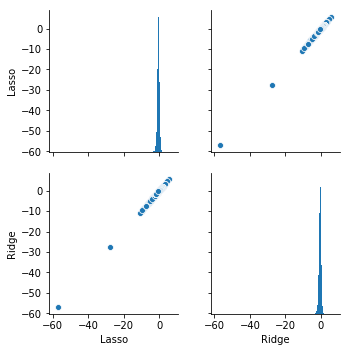

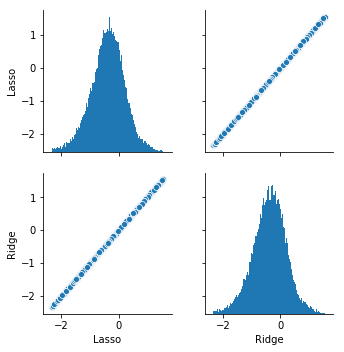

In [46]:
# plot
df = pd.DataFrame({'Ridge':test_pred_ridge, 'Lasso':test_pred_ridge})
sns.pairplot(df,diag_kws={'bins': 500}) # all values
sns.pairplot(df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)],diag_kws={'bins': 500}) # non outliers

In [12]:
# submit file
#submit(test_pred_ridge,"Ridge")
#submit(test_pred_lasso,"Lasso")
submit(test_pred_bag,"Bagging")

# Gradient Boosting method

In [7]:
# read file
train_name = "train_20181223"; test_name = "test_20181223"; features_name = "features_20181223";
train, test, features, target = read_data(train_name,test_name,features_name)

201917 observations and 121 features in train set.
123623 observations and 119 features in test set.
118 observations and 1 features in features set.


## Light GBM

In [8]:
# parameters
param_set = {'num_leaves': 31,
             'min_data_in_leaf': 30, 
             'objective':'regression',
             'max_depth': -1,
             'learning_rate': 0.01,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'rmse',
             "lambda_l1": 0.1,
             "verbosity": -1,
             "nthread": 4,
             "random_state": 831}

In [ ]:
val_pred_lgb, test_pred_lgb, model = gb.Regressors(gb.Lightgbm_Regressor,param_set,train,test,features,target,folds=5)